# 프로젝트 : 나랑 닮은 연예인을 찾아보자   

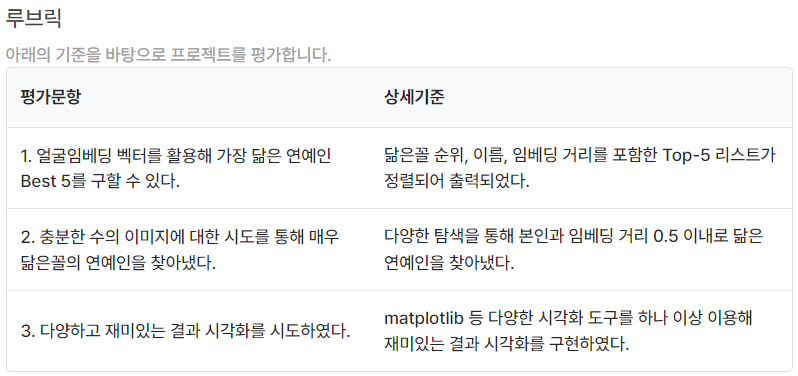 

In [15]:
# 주요 라이브러리 버전 확인 
import face_recognition
import numpy
import PIL

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


## Step1. 사진 모으기

file_list: ['소희.jpg', '조이.jpg', '구혜선.jpg', '성유리.jpg', '유진.jpg', '제니.jpg', '김연아.jpg', '이영애.jpg', '한예슬.jpg', '황정민.jpg', '나-일반.jpg', '설현.jpg', '나-안경.jpg', '김수현.jpg', '김희선.jpg', '김태희.jpg', '한소희.jpg', '정국.jpg', '차은우.jpg', '마동석.jpg', '강동원.jpg', '배용준.jpg', '손예진.jpg', '고창석.jpg']


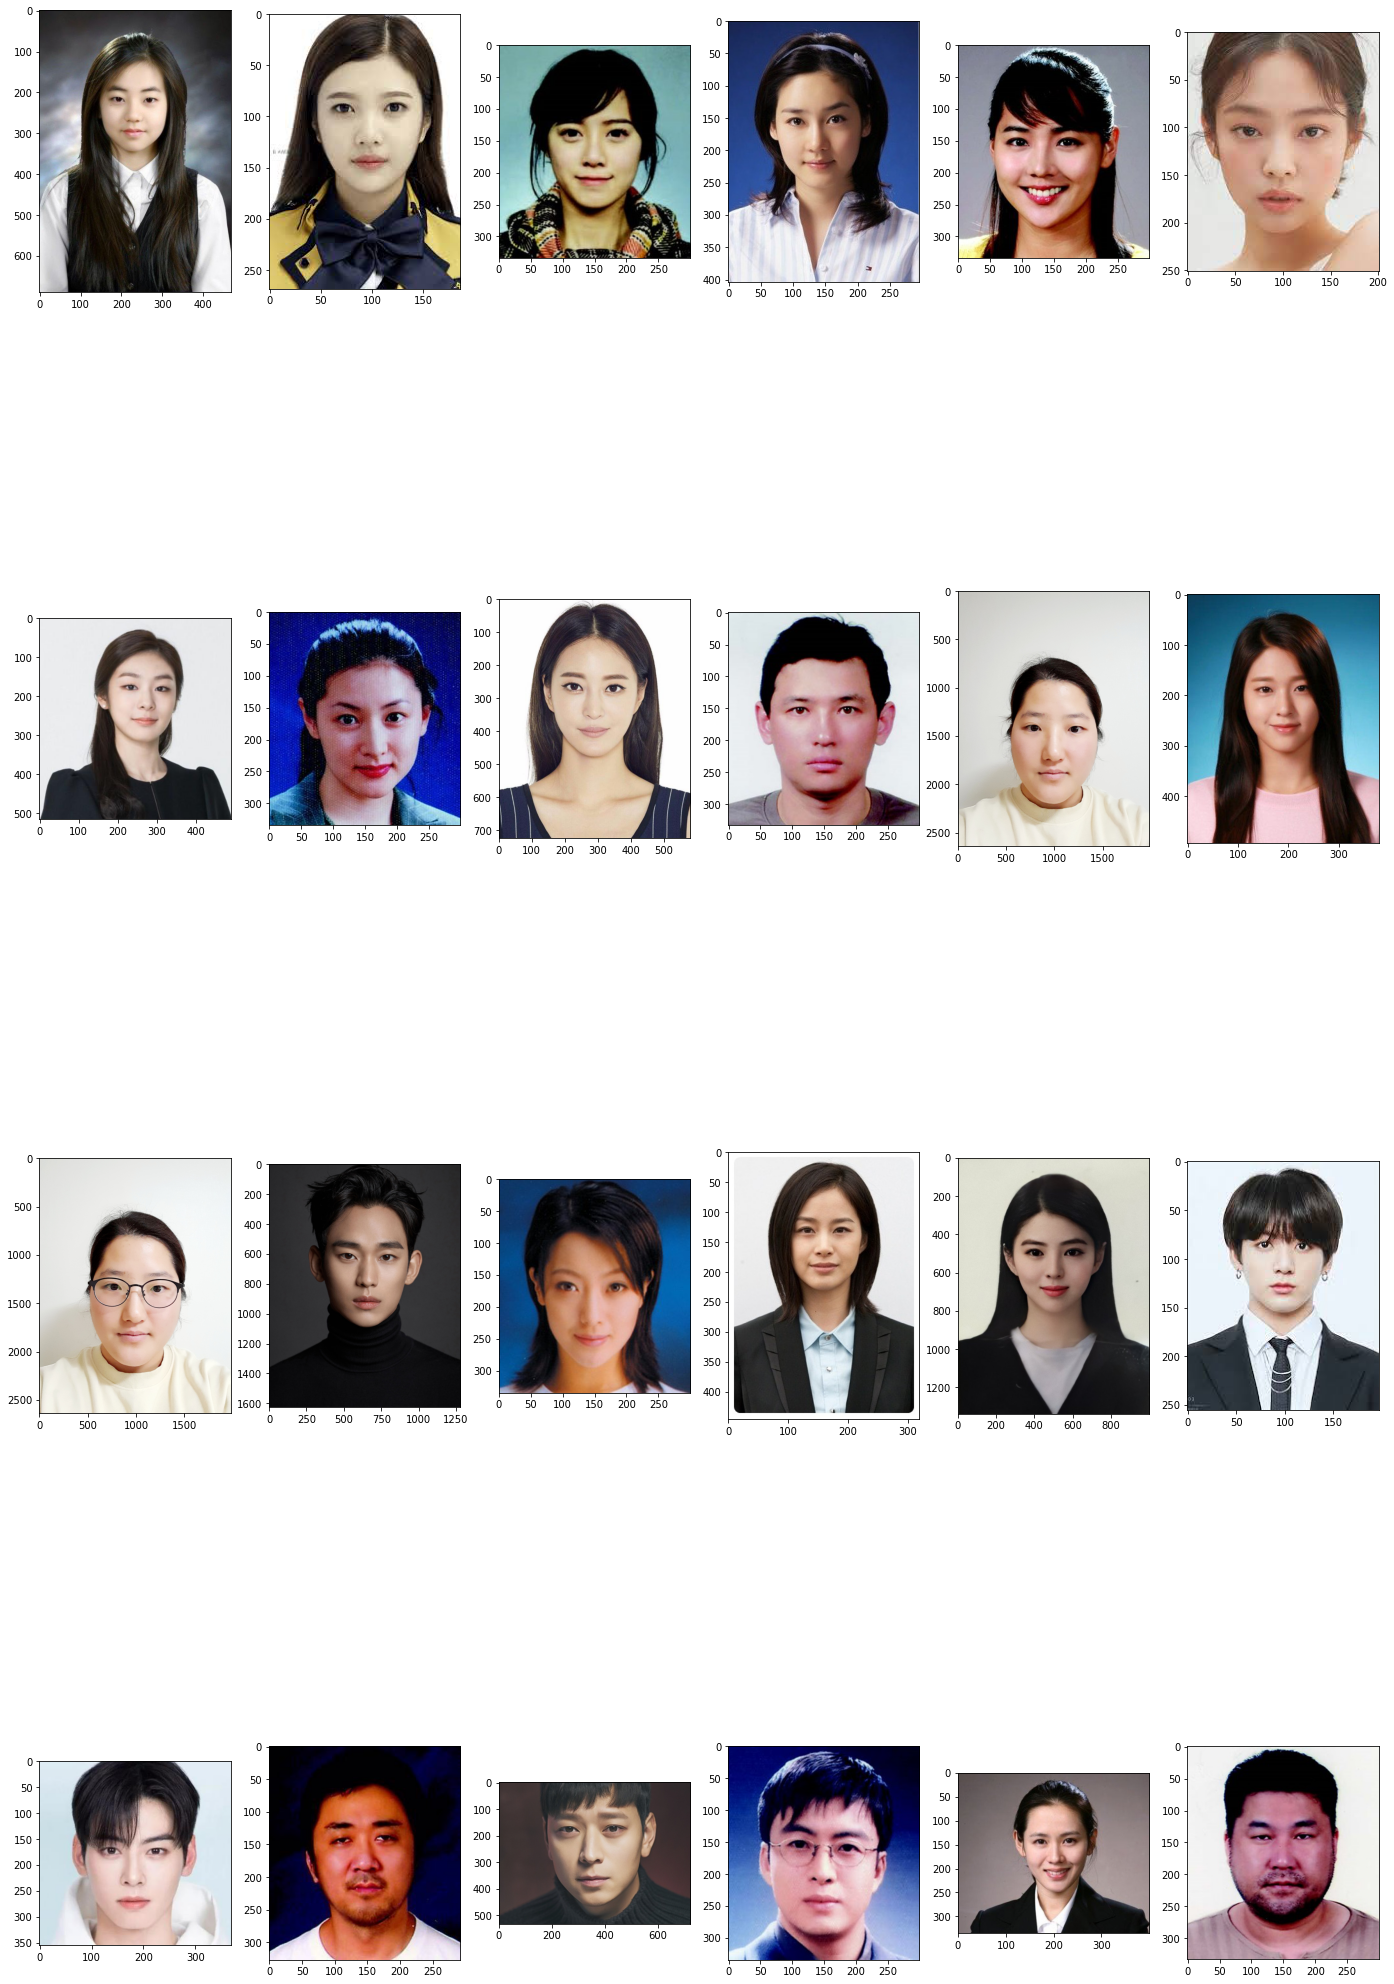

In [16]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24,40))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

'IsADirectoryError Traceback (most recent call last)'에러가 났다.     
이미지 사이즈가 서로 달라서 그런가 싶었는데, 노드의 미 대통령 사진도 사이즈가 달랐다.     
이미지 형식이 전부 jpg가 아니라서 그런가 했는데, 모두 jpg로 바꿔주어도 같은 에러가 났다. 
혹시나해서 클라우드 쉘에서 celeb 폴더에 들어가보니 숨겨진 .ipynb_checkpoint 파일이 있었다. 해당 파일을 지우니 해결되었다. 

[(1150, 1469, 2108, 510)]


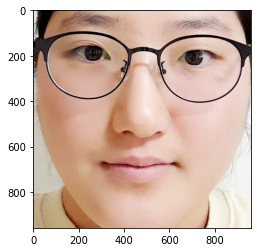

In [17]:
import face_recognition
# %matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb/나-안경.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

## Step2. 얼굴 영역 자르기

In [18]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [19]:
from PIL import Image
image_name = os.listdir('/aiffel/aiffel/face_embedding/celeb')

for i in image_name:
    image_file = os.path.join(dir_path, i)
    face = get_cropped_face(image_file) 
    pillow_image = Image.fromarray(face) 
    crop_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb_crop/'
    pillow_image.save(crop_path + i)

IsADirectoryError: [Errno 21] Is a directory: '/aiffel/aiffel/face_embedding/celeb' 에러가 계속 나왔다.     
crop할 때 계속 이미지 경로를 넣어주었는데, 파일 리스트를 넣어서 crop하고 저장해야한다.     
for문으로 파일 목록을 넣으면 crop해 저장하도록 만들었다. 

REF)  
https://lapina.tistory.com/122 PIL 이미지 경로에 저장하는 방법    
https://eehoeskrap.tistory.com/496 디렉토리의 파일 목록 얻는 방법, os.listdir(path)    
https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save image.save 옵션 

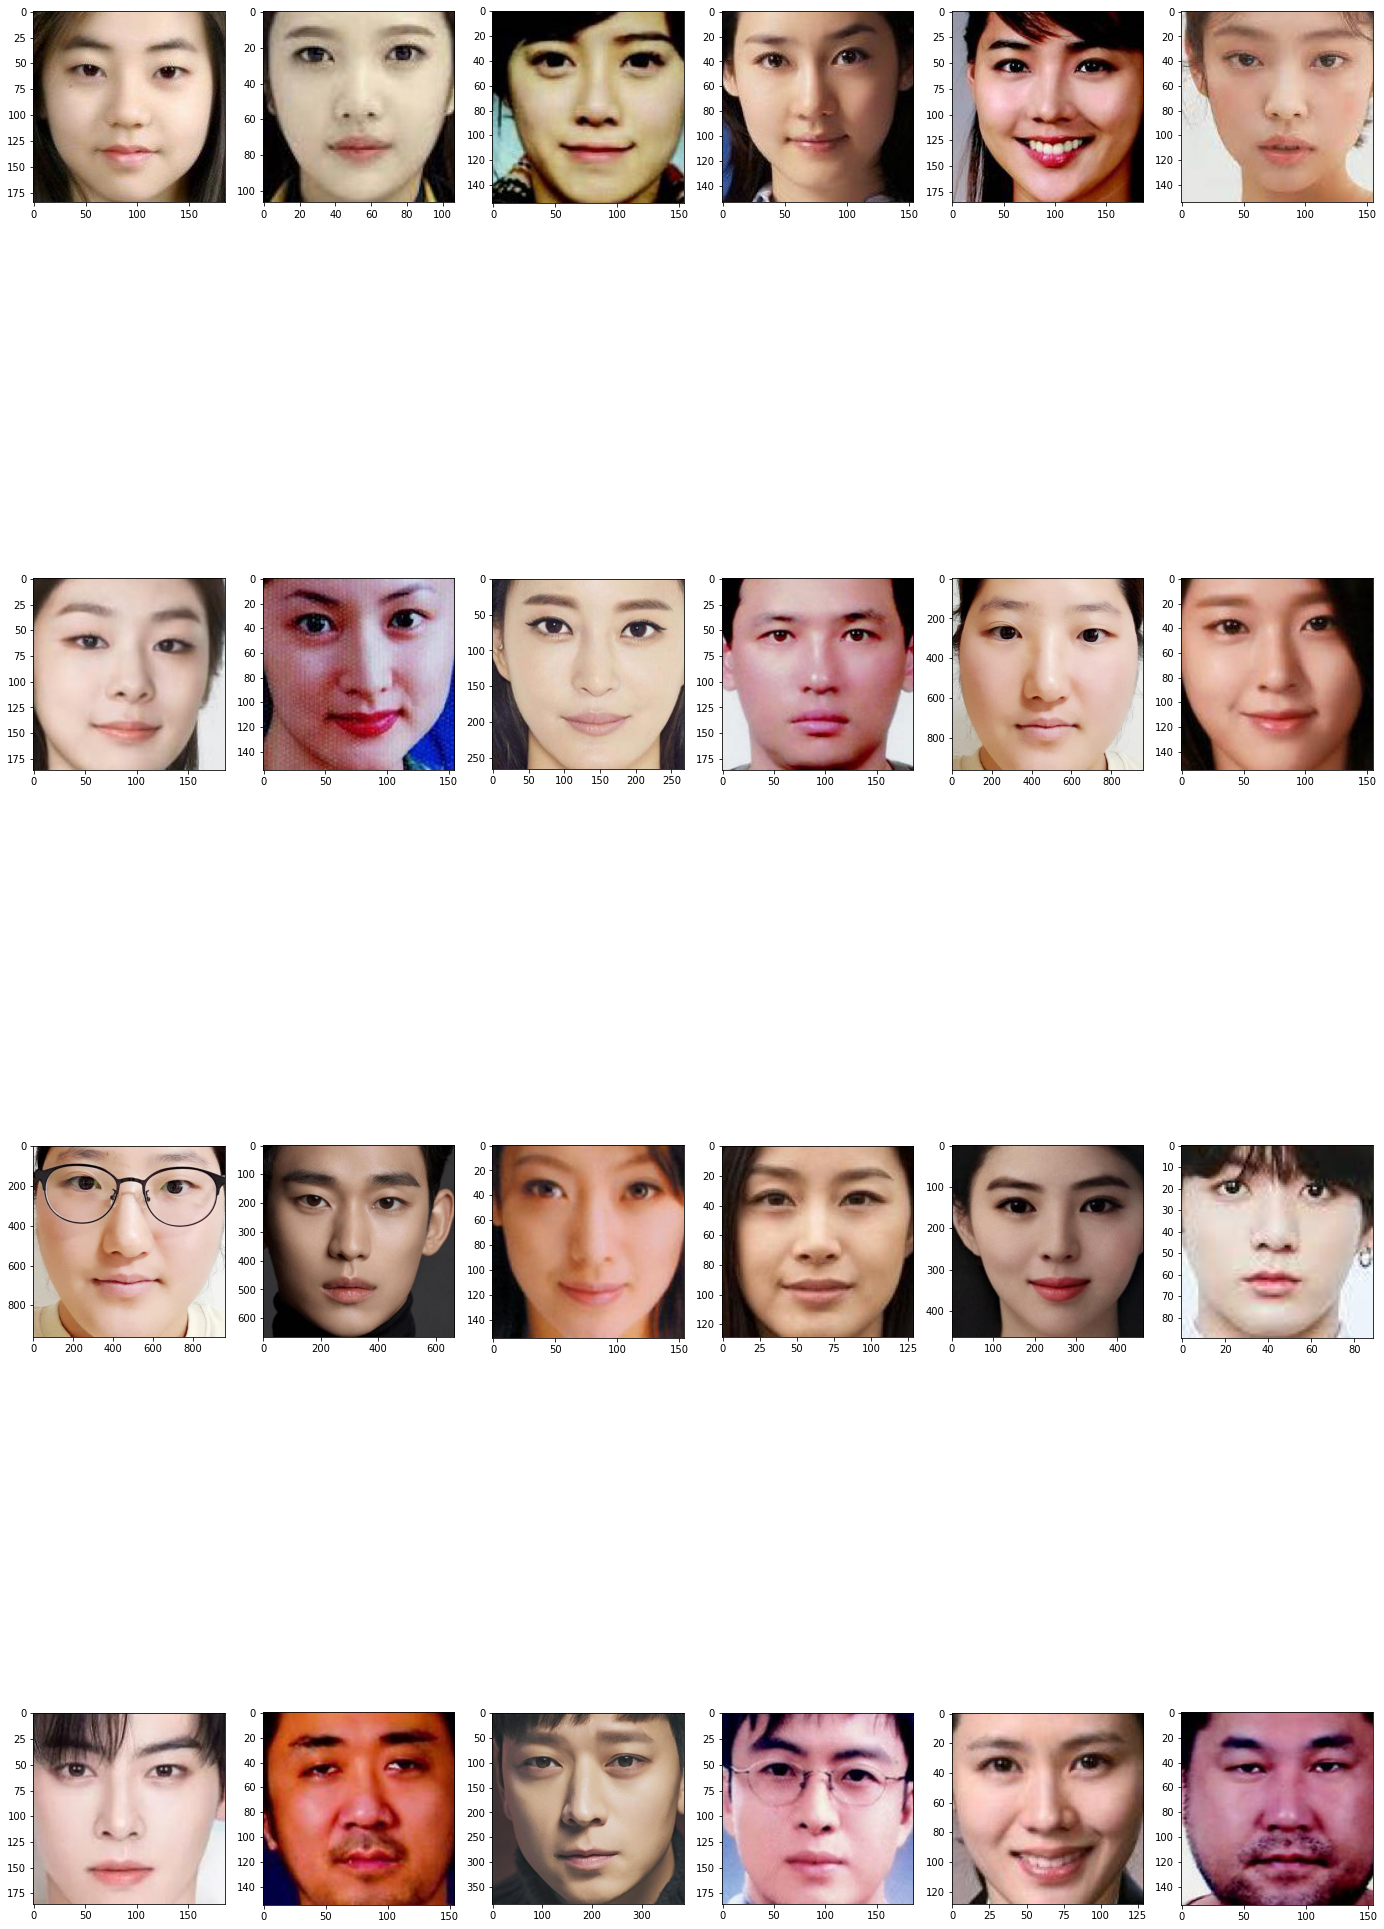

In [20]:
# 크롭된 이미지 확인 

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24,40))

for i, ax in enumerate(axes.flatten()):
  image = img.imread(crop_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## Step3. 얼굴 영역의 임베딩 추출하기

In [21]:
file_list = os.listdir(crop_path)

print ("file_list: {}".format(file_list))

file_list: ['소희.jpg', '조이.jpg', '구혜선.jpg', '성유리.jpg', '유진.jpg', '제니.jpg', '김연아.jpg', '이영애.jpg', '한예슬.jpg', '황정민.jpg', '나-일반.jpg', '설현.jpg', '나-안경.jpg', '김수현.jpg', '김희선.jpg', '김태희.jpg', '한소희.jpg', '정국.jpg', '차은우.jpg', '마동석.jpg', '강동원.jpg', '배용준.jpg', '손예진.jpg', '고창석.jpg']


In [22]:
image_file = os.path.join(dir_path, '나-일반.jpg')
face = get_cropped_face(image_file)  

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.16024068,  0.0602673 ,  0.02627581, -0.07224282, -0.16094273,
        -0.06043318, -0.07195532, -0.1421295 ,  0.12110025, -0.17070971,
         0.16868547, -0.10360097, -0.12672842, -0.0365454 , -0.08379626,
         0.21471138, -0.16064885, -0.11581857, -0.07948637, -0.02078946,
         0.08972893,  0.01189571, -0.02471261,  0.02318086, -0.12402052,
        -0.31004953, -0.09310375, -0.04170088,  0.03883733, -0.0606935 ,
        -0.02750202,  0.10953649, -0.14533328, -0.00900847, -0.00375964,
         0.11532623, -0.00559682, -0.05544605,  0.11454085, -0.00936525,
        -0.24412923,  0.03162673,  0.06897296,  0.20874982,  0.20132235,
        -0.04740798,  0.02130663, -0.15280832,  0.12196715, -0.1356063 ,
        -0.05910778,  0.10711536,  0.03918537,  0.09837226,  0.05424019,
        -0.05818615,  0.07779441,  0.10679682, -0.12085469,  0.005881  ,
         0.14126815, -0.03203949, -0.06370816, -0.10872882,  0.17312713,
         0.07700524, -0.11260881, -0.18998811,  0.1

In [23]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)       # 경로 
        face = get_cropped_face(img_path)             # 얼굴 부분만 자르기 
        embedding = get_face_embedding(face)          # 임베딩  
        if len(embedding) > 0:                         
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]     
        
    return embedding_dict 

In [25]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['나-안경']

array([-0.11407865,  0.05233661,  0.02601749, -0.05680892, -0.13829616,
       -0.04667355, -0.12223737, -0.12371822,  0.10519972, -0.18265344,
        0.17463472, -0.08563192, -0.17239641,  0.00576344, -0.09862593,
        0.21272101, -0.13015391, -0.12328248, -0.08581983, -0.02848514,
        0.04726043,  0.02694418,  0.00332198,  0.0341734 , -0.13842362,
       -0.30799225, -0.07918853, -0.02021486, -0.00307735, -0.04945151,
       -0.04512707,  0.1244482 , -0.1158184 ,  0.04783913,  0.02510561,
        0.14320685,  0.01260684, -0.08163829,  0.18262643,  0.00151598,
       -0.29127157,  0.02336975,  0.06258424,  0.18950237,  0.22061658,
       -0.03143123,  0.04660221, -0.17145047,  0.09737633, -0.12328979,
        0.00176622,  0.1420265 ,  0.02258725,  0.05400518,  0.02591656,
       -0.11194694,  0.05178901,  0.15364391, -0.06665092, -0.05021597,
        0.12442791, -0.06905736, -0.04400701, -0.07999964,  0.16316445,
        0.07170572, -0.12288486, -0.17865837,  0.15743044, -0.13

## Step4. 모은 연예인들과 비교하기

In [26]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [27]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [28]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [29]:
get_nearest_face('나-일반')

순위 1 : 이름(나-안경), 거리(0.3491912273836737)
순위 2 : 이름(김희선), 거리(0.4992271869053717)
순위 3 : 이름(김태희), 거리(0.5019659898029203)
순위 4 : 이름(성유리), 거리(0.5031381705256228)
순위 5 : 이름(황정민), 거리(0.5103723369580702)
순위 6 : 이름(제니), 거리(0.5222629926087933)
순위 7 : 이름(이영애), 거리(0.522924963514299)
순위 8 : 이름(조이), 거리(0.5267084659106555)
순위 9 : 이름(김연아), 거리(0.5279785242456148)
순위 10 : 이름(한소희), 거리(0.5285662060821793)


연예인 중에서는 김희선님이 거리가 0.49로 가장 가깝게 나왔다.    
내 사진 끼리의 거리는 0.34로 생각보다 멀게 나왔다. 단순히 안경의 유무만 다를뿐 구도나 표정은 비슷한데 생각보다 멀다.
안경 하나의 차이도 픽셀로 따지면 큰 차이라서 거리가 멀게 나온 것 같다. 
또한 이 코드를 실행할때마다 순위가 조금씩 바뀌기도 한다.  

## Step5. 다양한 재미있는 시각화 시도해 보기
비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎

In [35]:
# from tkinter import *
# from PIL import ImageTk,Image

In [36]:
# root = tk.Tk()
# root.mainloop()

TclError: no display name and no $DISPLAY environment variable

TclError: no display name and no $DISPLAY environment variable 에러 찾아봤더니,     
colab이나 jupyter에서는 tkinter가 작동되지 않아서 이런 에러가 나온다고 한다. 

REF)   
https://hleecaster.com/tkinter-introduction/   
https://www.inflearn.com/questions/60147/%EC%97%90%EB%9F%AC%EC%97%90-%EB%8C%80%ED%95%9C-%EC%A7%88%EB%AC%B8%EC%9E%85%EB%8B%88%EB%8B%A4

In [31]:
pip install --upgrade flask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 16.3 MB/s eta 0:00:00
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.0
    Uninstalling MarkupSafe-2.1.0:
      Successfully uninstalled MarkupSafe-2.1.0
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.0.3
    Uninstalling Werkzeug-2.0.3:
      Successfully uninstalled Werkzeug-2.0.3
  Attempting uninstall: flask
    Found existing installation: Flask 2.0.2
    Uninstalling Flask-2.0.2:
      Successfully uninstalled Flask-2.0.2
Note: you may need to restart the kernel to use updated packages.


REF)    
https://namu.wiki/w/Flask

In [41]:
from flask import Flask, render_template 
 
app = Flask(__name__)
 
@app.route("/")
def home():
    return render_template('img_static.html')
 
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/werkzeug/serving.py", line 911, in prepare_socket
    s.bind(server_address)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_32/3022139809.py", line 10, in <module>
    app.run()
  File "/opt/conda/lib/python3.9/site-packages/flask/app.py", line 1188, in run
    run_simple(t.cast(str, host), port, self, **options)
  File "/opt/conda/lib/python3.9/site-packages/werkzeug/serving.py", line 1062, in run_simple
    s = prepare_socket(hostname, port)
  File "/opt/conda/lib/python3.9/site-packages/werkzeug/serving.py", line 930, in prepare_socket
    sys.exit(1)
SystemExit: 1

During handling of the above exception, another exception o

TypeError: object of type 'NoneType' has no len()

In [ ]:
<!doctype html>
<html>
  <head>
  </head>
  <body>
    <img src="{{ url_for('static', filename='image/test.jpeg') }}">
  </div>
  </body>
</html>

REF)   
https://aplab.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%81%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%82%BD%EC%9E%85

## 회고 

<헤맨 부분>
- 이미지 crop해서 다시 저장하는 부분에서 for문을 짜는데 엄청 시간을 오래 썼다.
- tkinter에서 TclError에러가 났다. 

<시도해본 것과 실패한 원인 추론> 
- pil 이미지 save할 때 소괄호() 안에 경로를 직접 넣어주었다. for문으로 이미지 파일을 하나씩 저장해야하기 때문에 괄호안에 이미지 파일명도 받아야해서 에러가 난 것 같다. 

<새롭게 알게된 부분>
- IsADirectoryError는 이미지가 들어있는 폴덕가 아닌, 이미지 파일 자체를 경로로 잡아줘야한다. 
- 한번에 여러개의 이미지를 불러오고자할 때는 for문으로 각각의 이미지를 불러와야한다.  
- tkinter는 jupyter, colab에서는 작동되지 않는다. 

<아직도 모르는 부분>
- 노드에서 본인 사진을 2장 넣으라고 해서 넣었는데, 비교한 사진외에 나머지 하나는 어떻게 써야할지 모르겠다. 
- going deeper 첫 프로젝트라 최대한 노드나 인터넷의 코드를 안 보려고 했는데, 어떤 코드는 이해도 하기 힘들어서 처음부터 끝까지 내 손으로 코드짜기가 요원하다. 
- tkinter와 flask로 step5 내용을 실행해보려 했으나, 처음보는 내용이라 다른 사람의 코드를 참조해도 이해가 안됐다. 